## Preparing Data with MongoDB

In [1]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
from collections import OrderedDict

# Read the CSV file into a DataFrame
data = pd.read_csv('D:\\Code\\BigData\\project\\dataset\\Crop_recommendation.csv')
df = pd.DataFrame(data)

# Define the desired order of headers
headers = ['N', 'P', 'K', 'ph', 'temperature', 'humidity', 'rainfall', 'label']
df = df[headers]

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")  # Adjust if you're using a remote DB
db = client['crop_database']  # Your MongoDB database name
collection = db['crops']  # Your collection name

# Define crop-to-location mapping
crop_location_data = {
    'rice': [('China', 35.8617, 104.1954), ('India', 20.5937, 78.9629), ('Indonesia', -0.7893, 113.9213)],
    'maize': [('USA', 40.7128, -74.0060), ('Brazil', -14.2350, -51.9253), ('South Africa', -30.5595, 22.9375)],
    'chickpea': [('India', 20.5937, 78.9629), ('Australia', -25.2744, 133.7751), ('Turkey', 38.9637, 35.2433)],
    'kidneybeans': [('Mexico', 23.6345, -102.5528), ('USA', 19.4326, -99.1332)],
    'pigeonpeas': [('India', 20.5937, 78.9629), ('Myanmar', 21.9139, 95.9560), ('Tanzania', -6.369028, 34.8888)],
    'mothbeans': [('India', 23.6345, 78.9629), ('Pakistan', 30.3753, 69.3451), ('Sudan', 12.8628, 30.8025)],
    'mungbean': [('India', 20.5937, 78.9629), ('China', 35.8617, 104.1954), ('Myanmar', 21.9139, 95.9560)],
    'blackgram': [('India', 20.5937, 78.9629), ('Myanmar', 21.9139, 95.9560), ('Thailand', 15.8700, 100.9925)],
    'lentil': [('Canada', 56.1304, -106.3468), ('India', 20.5937, 78.9629), ('Turkey', 38.9637, 35.2433)],
    'pomegranate': [('India', 20.5937, 78.9629), ('Iran', 32.4279, 53.6880), ('USA', 36.7783, -119.4179)],
    'banana': [('India', 20.5937, 78.9629), ('Ecuador', -1.8312, -78.1834), ('Philippines', 12.8797, 121.7740)],
    'mango': [('India', 20.5937, 78.9629), ('Thailand', 15.8700, 100.9925), ('Mexico', 23.6345, -102.5528)],
    'grapes': [('Italy', 41.8719, 12.5674), ('Spain', 40.4637, -3.7492), ('USA', 36.7783, -119.4179)],
    'watermelon': [('India', 20.5937, 78.9629), ('China', 35.8617, 104.1954), ('USA', 36.7783, -119.4179)],
    'muskmelon': [('India', 20.5937, 78.9629), ('China', 35.8617, 104.1954), ('Turkey', 38.9637, 35.2433)],
    'apple': [('USA', 47.7511, -120.7401), ('China', 35.8617, 104.1954), ('Poland', 51.9194, 19.1451)],
    'orange': [('USA', 27.994402, -81.760254), ('Spain', 39.4637, -0.3763), ('Brazil', -14.2350, -51.9253)],
    'papaya': [('India', 20.5937, 78.9629), ('Indonesia', -0.7893, 113.9213), ('Philippines', 12.8797, 121.7740)],
    'coconut': [('India', 10.8505, 76.2711), ('Indonesia', -0.7893, 113.9213), ('Philippines', 12.8797, 121.7740)],
    'cotton': [('USA', 31.9686, -99.9018), ('China', 35.8617, 104.1954), ('India', 20.5937, 78.9629)],
    'jute': [('India', 23.685, 90.3563), ('Bangladesh', 23.685, 90.3563), ('China', 35.8617, 104.1954)],
    'coffee': [('Brazil', -14.2350, -51.9253), ('Ethiopia', 9.1450, 40.4897), ('Colombia', 4.5709, -74.2973)],
}

# Function to assign location and coordinates
def assign_location(row):
    crop = row['label']
    if crop in crop_location_data:
        location_info = crop_location_data[crop][np.random.randint(len(crop_location_data[crop]))]
        return pd.Series([location_info[0], location_info[1], location_info[2]], index=['location', 'latitude', 'longitude'])
    return pd.Series([None, None, None], index=['location', 'latitude', 'longitude'])

# Apply the function to assign location, latitude, and longitude to each row
df[['location', 'latitude', 'longitude']] = df.apply(assign_location, axis=1)

# Save the updated dataset to a new CSV file
df.to_csv('Crop_recommendation_with_location_Mongo.csv', index=False)

# Upload the updated DataFrame to MongoDB
data_dict = df.to_dict('records')
collection.insert_many(data_dict)

print("Data uploaded and updated successfully!")

# Print the data to verify
print("Data uploaded successfully! Here's a sample:")
for doc in collection.find().limit(5):  # Retrieve the first 5 documents
    print(doc)
    
# Print total document count in the collection
print(f"Total documents in collection: {collection.count_documents({})}")


Data uploaded and updated successfully!
Data uploaded successfully! Here's a sample:
{'_id': ObjectId('6751b14b8e690354b6d17e88'), 'N': 90, 'P': 42, 'K': 43, 'ph': 6.502985292000001, 'temperature': 20.87974371, 'humidity': 82.00274423, 'rainfall': 202.9355362, 'label': 'rice', 'location': 'India', 'latitude': 20.5937, 'longitude': 78.9629}
{'_id': ObjectId('6751b14b8e690354b6d17e89'), 'N': 85, 'P': 58, 'K': 41, 'ph': 7.038096361, 'temperature': 21.77046169, 'humidity': 80.31964408, 'rainfall': 226.6555374, 'label': 'rice', 'location': 'Indonesia', 'latitude': -0.7893, 'longitude': 113.9213}
{'_id': ObjectId('6751b14b8e690354b6d17e8a'), 'N': 60, 'P': 55, 'K': 44, 'ph': 7.840207144, 'temperature': 23.00445915, 'humidity': 82.3207629, 'rainfall': 263.9642476, 'label': 'rice', 'location': 'India', 'latitude': 20.5937, 'longitude': 78.9629}
{'_id': ObjectId('6751b14b8e690354b6d17e8b'), 'N': 74, 'P': 35, 'K': 40, 'ph': 6.980400905, 'temperature': 26.49109635, 'humidity': 80.15836264, 'rainfa

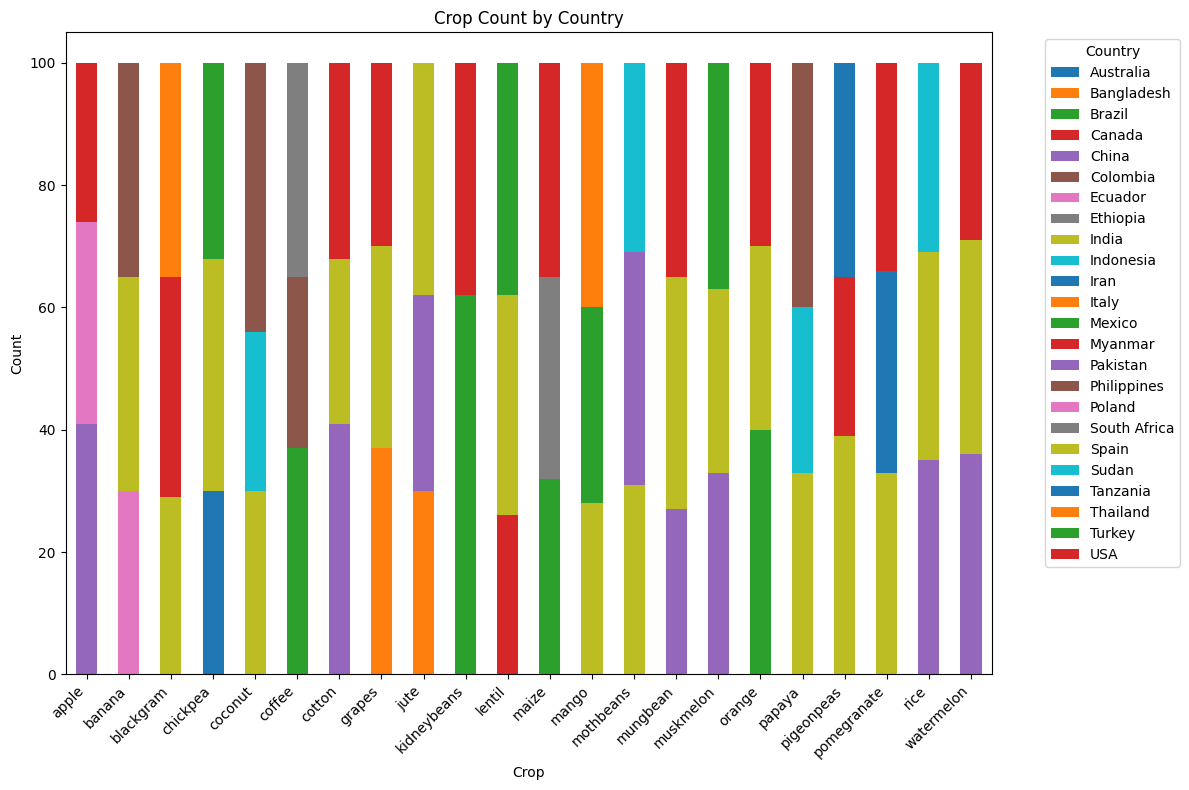

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your data loaded with crop and location columns
data = pd.read_csv('Crop_recommendation_with_location_Mongo.csv')

# Group by 'crop' and 'location' to count occurrences of each crop-country combination
crop_country_counts = data.groupby(['label', 'location']).size().reset_index(name='count')

# Create a pivot table for easier plotting
pivot_data = crop_country_counts.pivot(index='label', columns='location', values='count').fillna(0)

# Plot the data
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8))

# Customize the chart
plt.title('Crop Count by Country')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()
